# Cornell Movie Dialogs

In [ ]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [ ]:
### Dataframes

## Dataframes

### Conversations

In [ ]:
df_convos = corpus.get_conversations_dataframe()
df_convos

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
...,...,...,...,...,...,...,...
L666324,[],m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w..."
L666262,[],m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w..."
L666520,[],m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w..."


In [ ]:
df_movies = df_convos.drop_duplicates('meta.movie_idx')
df_movies = df_movies.reset_index(drop=True)
df_movies = df_movies.drop('vectors',axis=1)
df_movies.columns = [col.replace('meta.','') for col in df_movies.columns]
df_movies = df_movies.set_index('movie_idx')
df_movies['num_convos'] = df_convos.groupby('meta.movie_idx').size()
df_movies = df_movies.sort_values('num_convos',ascending=False)
df_movies

,movie_name,release_year,rating,votes,genre,num_convos
movie_idx,,,,,,
m289,casino,1995,8.10,111223,"['biography', 'crime', 'drama']",338
m90,his girl friday,1940,8.10,20870,"['comedy', 'drama', 'romance']",309
m435,meet joe black,1998,6.90,56839,"['drama', 'fantasy', 'mystery', 'romance']",301
m100,innerspace,1987,6.50,16854,"['action', 'adventure', 'comedy', 'crime', 'sc...",300
m380,hannah and her sisters,1986,7.90,21088,"['comedy', 'drama', 'romance']",289
...,...,...,...,...,...,...
m484,vampyr,1932,7.60,4005,"['fantasy', 'horror']",8
m270,the black dahlia,2006,5.60,35706,"['crime', 'drama', 'history', 'mystery', 'thri...",3
m521,soldier,1998/I,5.60,16446,"['action', 'drama', 'sci-fi']",3


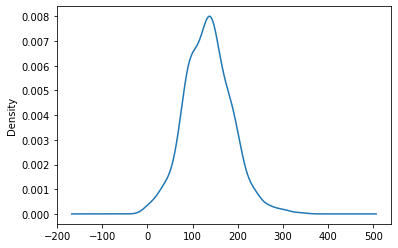

In [ ]:
# plot distribution?
df_movies.num_convos.plot.density()

In [ ]:
ratings = df_movies['rating']
ratings

movie_idx
m289    8.10
m90     8.10
m435    6.90
m100    6.50
m380    7.90
        ... 
m484    7.60
m270    5.60
m521    5.60
m602    6.30
m406    6.80
Name: rating, Length: 617, dtype: object

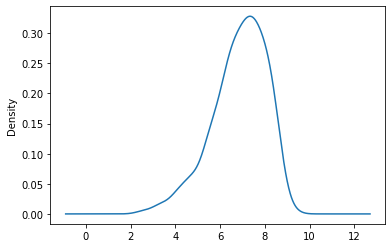

In [ ]:
import pandas as pd
ratings = pd.to_numeric(ratings)
ratings.plot.density()

### Speakers

In [ ]:
df_speakers = corpus.get_speakers_dataframe()
df_speakers

,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
id,,,,,,
u0,[],BIANCA,m0,10 things i hate about you,f,4
u2,[],CAMERON,m0,10 things i hate about you,m,3
u3,[],CHASTITY,m0,10 things i hate about you,?,?
u4,[],JOEY,m0,10 things i hate about you,m,6
u5,[],KAT,m0,10 things i hate about you,f,2
...,...,...,...,...,...,...
u9029,[],CREALOCK,m616,zulu dawn,?,?
u9033,[],STUART SMITH,m616,zulu dawn,?,?
u9028,[],COGHILL,m616,zulu dawn,?,?


In [ ]:
df_speakers['meta.gender'].value_counts()

?    6020
m    1899
f     921
M     150
F      45
Name: meta.gender, dtype: int64

In [ ]:
df_speakers['meta.gender'].apply(lambda gender: gender.lower()).value_counts()

?    6020
m    2049
f     966
Name: meta.gender, dtype: int64

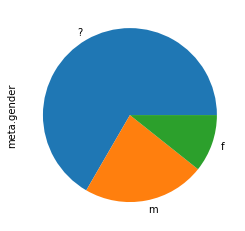

In [ ]:
df_speakers['meta.gender'].apply(lambda x: x.lower()).value_counts().plot.pie()

In [ ]:
# dfconvo=corpus.get_conversations_dataframe()
# dfutt=corpus.get_utterances_dataframe()
# dfchars=corpus.get_speakers_dataframe()

In [ ]:
for convo in corpus.iter_conversations(): break
convo

Conversation({'obj_type': 'conversation', 'meta': {'movie_idx': 'm0', 'movie_name': '10 things i hate about you', 'release_year': '1999', 'rating': '6.90', 'votes': '62847', 'genre': "['comedy', 'romance']"}, 'vectors': [], 'tree': None, 'owner': <convokit.model.corpus.Corpus object at 0x7f08c6df3090>, 'id': 'L1044'})

In [ ]:
for utt in convo.iter_utterances(): break
utt

Utterance({'obj_type': 'utterance', 'meta': {'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PRP', 'dep': 'nsubj', 'up': 1, 'dn': []}, {'tok': 'do', 'tag': 'VBP', 'dep': 'ROOT', 'dn': [0, 2, 3]}, {'tok': 'not', 'tag': 'RB', 'dep': 'neg', 'up': 1, 'dn': []}, {'tok': '!', 'tag': '.', 'dep': 'punct', 'up': 1, 'dn': []}]}]}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'character_name': 'BIANCA', 'movie_idx': 'm0', 'movie_name': '10 things i hate about you', 'gender': 'f', 'credit_pos': '4'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7f08c6df3090>, 'id': 'u0'}), 'conversation_id': 'L1044', 'reply_to': 'L1044', 'timestamp': None, 'text': 'They do not!', 'owner': <convokit.model.corpus.Corpus object at 0x7f08c6df3090>, 'id': 'L1045'})

In [ ]:
for speaker in convo.iter_speakers(): break
speaker

Speaker({'obj_type': 'speaker', 'meta': {'character_name': 'CAMERON', 'movie_idx': 'm0', 'movie_name': '10 things i hate about you', 'gender': 'm', 'credit_pos': '3'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7f08c6df3090>, 'id': 'u2'})

In [ ]:
speaker

In [ ]:
movie_to_speakers=defaultdict(set)
for speaker_id,speaker in corpus.speakers.items():
  movie_id=speaker.meta.get('movie_idx')
  movie_to_speakers[movie_id]|={speaker_id}

movie_to_speakers['m0']

In [ ]:
from pprint import pprint,pformat

In [ ]:
utt = corpus.random_utterance()

# primary data fields
# pprint("ID:", utt.id)
# print("Reply_to:", utt.reply_to, "\n")
# print("Timestamp:", utt.timestamp, "\n")
# print("Text:", utt.text, "\n")
# print("Conversation ID:", utt.conversation_id, "\n")
# print("Speaker ID:", utt.speaker.id)

o=f"""
[Speaker]
{pformat(utt.speaker.meta)}

[Speech]
"{utt.text}"
{pformat(utt.meta)}
"""
print(o)


[Speaker]
{'character_name': 'DEFENSE ATTORNEY',
 'credit_pos': '?',
 'gender': '?',
 'movie_idx': 'm426',
 'movie_name': 'lost souls'}

[Speech]
"You have to tell me who did it."
{'movie_id': 'm426',
 'parsed': [{'rt': 1,
             'toks': [{'dep': 'nsubj',
                       'dn': [],
                       'tag': 'PRP',
                       'tok': 'You',
                       'up': 1},
                      {'dep': 'ROOT',
                       'dn': [0, 3, 8],
                       'tag': 'VBP',
                       'tok': 'have'},
                      {'dep': 'aux',
                       'dn': [],
                       'tag': 'TO',
                       'tok': 'to',
                       'up': 3},
                      {'dep': 'xcomp',
                       'dn': [2, 4, 6],
                       'tag': 'VB',
                       'tok': 'tell',
                       'up': 1},
                      {'dep': 'dobj',
                       'dn': [],
           

In [ ]:
from convokit import FightingWords
fw=FightingWords()
# fw.fit(
#     corpus,
#     class1_func = lambda utt: utt.speaker.meta.get('gender')=='f',
#     class2_func = lambda utt: utt.speaker.meta.get('gender')=='m'
# )
fw.fit??

Initializing default CountVectorizer with ngram_range (1, 3)... Done.


In [ ]:
fw?

Object `fw` not found.


In [ ]:
## Conversations

In [ ]:
convo = corpus.random_conversation()
pprint(convo.meta)
print()
convo.print_conversation_structure(lambda utt: utt.speaker.meta.get('character_name','?').upper()+': '+utt.text)

{'genre': "['action', 'adventure', 'crime']",
 'movie_idx': 'm613',
 'movie_name': 'xxx',
 'rating': '5.60',
 'release_year': '2002',
 'votes': '53505'}

GIBBONS: You've really got me confused, Cage. On the one hand you showed leadership, courage under fire, a willingness to protect men you hardly knew... and on the other you have an arrest record that pegs you as near sociopathic. Help me out here. I'm not following your evolution.
    XANDER: You want the cheap backstory? The runaway mom, the suicide dad and the foster homes? Gimme a break. You're not interested in my past, you're interested in my future as some kind of spy.
        GIBBONS: You're perceptive too. I forgot to add that to the list of surprises. I'm with the National Security Agency. And unlikely as it may sound, I need your help.
            XANDER: I'm not interested. I've already got a job.
                GIBBONS: You're an adrenaline junkie with one foot in the penitentiary. You risk your ass building a daredevil 